In [3]:
options(warn=-1)
library(h2o)
localH2O = h2o.init()

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         39 seconds 807 milliseconds 
    H2O cluster timezone:       America/Sao_Paulo 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.24.0.3 
    H2O cluster version age:    20 days  
    H2O cluster name:           H2O_started_from_R_A57240303_zop846 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.52 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, Algos, AutoML, Core V3, Core V4 
    R Version:                  R version 3.5.2 (2018-12-20) 



In [5]:
train <- h2o.importFile("E:\\1.DATA_ANALYTICS\\17-Analise Preditiva Avancada\\Exercicio_5\\Datasets\\train.csv")
test <- h2o.importFile("E:\\1.DATA_ANALYTICS\\17-Analise Preditiva Avancada\\Exercicio_5\\Datasets\\test.csv")

  |======================================================================| 100%
  |======================================================================| 100%


In [6]:
head(train)

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C776,C777,C778,C779,C780,C781,C782,C783,C784,C785
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [7]:
y <- "C785"
x <- setdiff(names(train), y)

train[,y] <- as.factor(train[,y])
test[,y] <- as.factor(test[,y])

In [14]:
options(warn=-1)
set.seed(314)
model <- h2o.deeplearning(  x = x, 
                            y = y,
                            training_frame = train,
                            validation_frame = test,
                            distribution = "multinomial",
                            activation = "RectifierWithDropout",
                            hidden = c(32,32,32),
                            input_dropout_ratio = 0.2,
                            sparse = TRUE,
                            l1 = 1e-5,
                            epochs = 10)

  |======================================================================| 100%


In [15]:
model

Model Details:

H2OMultinomialModel: deeplearning
Model ID:  DeepLearning_model_R_1558995100026_2 
Status of Neuron Layers: predicting C785, 10-class classification, multinomial distribution, CrossEntropy loss, 25.418 weights/biases, 542,3 KB, 600.000 training samples, mini-batch size 1
  layer units             type dropout       l1       l2 mean_rate rate_rms
1     1   717            Input 20.00 %       NA       NA        NA       NA
2     2    32 RectifierDropout 50.00 % 0.000010 0.000000  0.031829 0.180644
3     3    32 RectifierDropout 50.00 % 0.000010 0.000000  0.000352 0.000211
4     4    32 RectifierDropout 50.00 % 0.000010 0.000000  0.000640 0.000479
5     5    10          Softmax      NA 0.000010 0.000000  0.002490 0.001992
  momentum mean_weight weight_rms mean_bias bias_rms
1       NA          NA         NA        NA       NA
2 0.000000   -0.011109   0.066115  0.497612 0.191362
3 0.000000   -0.027429   0.201428  0.675023 0.352105
4 0.000000   -0.042768   0.211318  0.744104 

In [16]:
h2o.confusionMatrix(model, test)

,0,1,2,3,4,5,6,7,8,9,Error,Rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,926,0,8,1,0,37,5,2,0,1,0.05510204,54 / 980
1,0,1090,10,6,0,1,3,1,24,0,0.03964758,45 / 1.135
2,1,0,977,6,5,11,9,10,12,1,0.05329457,55 / 1.032
3,1,0,35,907,0,34,0,16,15,2,0.10198020,103 / 1.010
4,0,0,8,1,912,6,17,1,6,31,0.07128310,70 / 982
5,5,1,11,29,5,810,5,6,15,5,0.09192825,82 / 892
6,4,1,28,1,5,43,875,0,1,0,0.08663883,83 / 958
7,1,4,32,11,2,2,0,939,1,36,0.08657588,89 / 1.028
8,3,2,12,17,11,83,5,9,825,7,0.15297741,149 / 974


variable,relative_importance,scaled_importance,percentage
<chr>,<dbl>,<dbl>,<dbl>
C351,1.0000000,1.0000000,0.003190805
C378,0.8473619,0.8473619,0.002703767
C434,0.8371550,0.8371550,0.002671199
C376,0.8346823,0.8346823,0.002663309
C406,0.8320830,0.8320830,0.002655015
C379,0.8302693,0.8302693,0.002649228


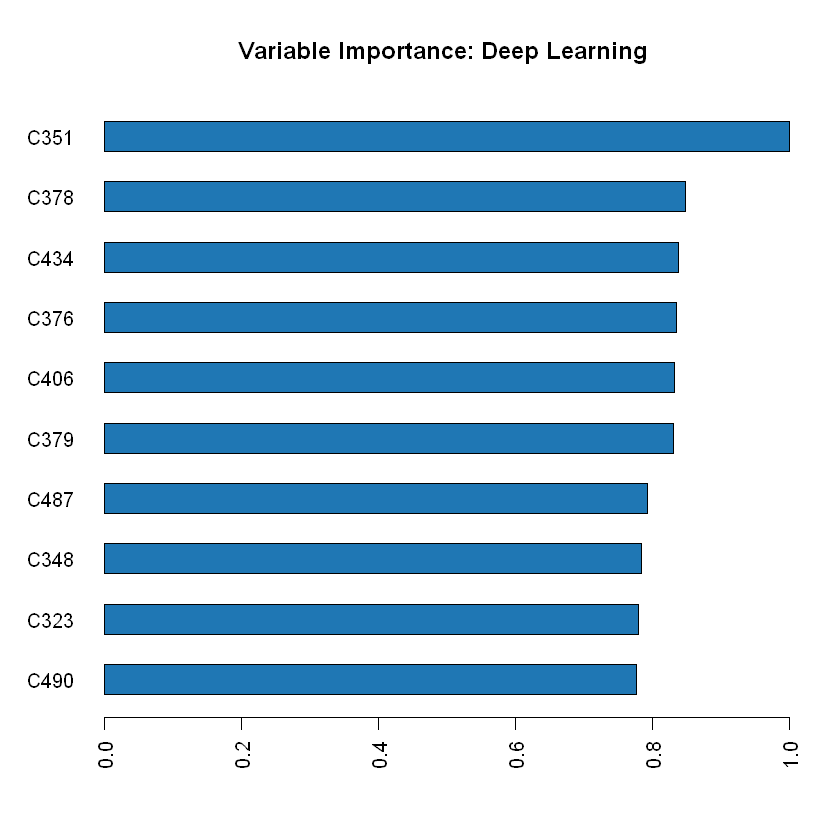

In [17]:
head(h2o.varimp(model))

h2o.varimp_plot(model)

In [29]:
pred <- h2o.predict(model, newdata = test)
head(pred)

ERROR: Error in chk.H2OFrame(x): must be an H2OFrame


In [28]:
pred[c(25,65,95),1]

  predict
1       9
2       0
3       6

[3 rows x 1 column] 

In [30]:
test_pred <- as.data.frame(test)

NULL

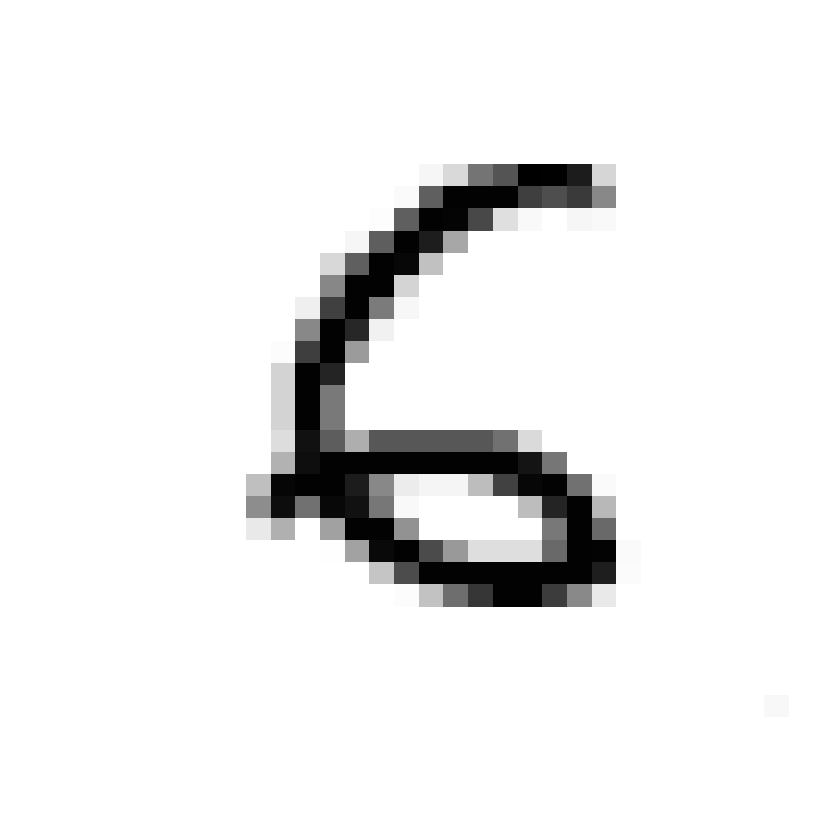

In [35]:
library(caret)
library(mlbench)
library(ggplot2)

m2 = matrix(unlist(test_pred[95,-1]), nrow = 28, byrow = TRUE)
m2 <- t(apply(m2, 2, rev))

img <- image(m2,col = grey(level = seq(1, 0, by=-1/255)), axes=F)
img

In [37]:
df <- h2o.importFile("E:\\1.DATA_ANALYTICS\\17-Analise Preditiva Avancada\\Exercicio_2\\BostonCredit_Exercise.csv")


  |======================================================================| 100%


In [38]:
options(warn=-1)
set.seed(314)

df_split <- h2o.splitFrame(data=df, ratios=0.7)

train <- df_split[[1]]
test <- df_split[[2]]

In [39]:
y <- "APPROVED"
x <- setdiff(names(train), y)

In [40]:
options(warn=-1)

model <- h2o.deeplearning(  x = x, 
                            y = y,
                            training_frame = train,
                            validation_frame = test,
                            distribution = "bernoulli",
                            activation = "RectifierWithDropout",
                            hidden = c(32,32,32),
                            input_dropout_ratio = 0.2,
                            sparse = TRUE,
                            l1 = 1e-5,
                            epochs = 100,
                            seed = 314)

  |======================================================================| 100%


In [41]:
h2o.confusionMatrix(model,test)

,No,Yes,Error,Rate
,<dbl>,<dbl>,<dbl>,<fct>
No,73,10,0.12048193,=10/83
Yes,3,64,0.04477612,=3/67
Totals,76,74,0.08666667,=13/150


In [49]:
model <- h2o.deeplearning(  x = x, 
                            y = y,
                            training_frame = train,
                            validation_frame = test,
                            distribution = "bernoulli",
                            activation = "RectifierWithDropout",
                            hidden = c(5),
                            input_dropout_ratio = 0.2,
                            sparse = TRUE,
                            l1 = 1e-5,
                            epochs = 10,
                            seed = 314)

  |======================================================================| 100%


In [50]:
h2o.confusionMatrix(model,test)

,No,Yes,Error,Rate
,<dbl>,<dbl>,<dbl>,<fct>
No,47,36,0.4337349,=36/83
Yes,19,48,0.2835821,=19/67
Totals,66,84,0.3666667,=55/150
